https://blog.naver.com/h0609zxc

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sampleSubmission.csv', 'test.csv']


# columns Description
- datetime - 시간, 연월일시분초 정보가 들어있는 컬럼.
- season - 계절 (봄, 여름, 가을, 겨울)
- holiday - 공휴일 (0: 공휴일X, 1: 공휴일)
- workingday - 근무일 (0: 근무일X, 1: 근무일)
- weather - 날씨 (1: 맑음, 2: 안개/구름, 3: 약한 눈/비/천둥, 4: 강한 눈/비/우박
- temp - 온도
- atemp - 체감 온도
- humidity - 습도
- windspeed - 풍속
- casual - 비회원의 자전거 대여량.
- registered - 회원의 자전거 대여량.
- count - 총 자전거 대여랑, casual + registered

In [25]:
train = pd.read_csv('../input/train.csv', parse_dates=['datetime']) #datetime column -> datetype으로 parsing해서 불러올 것
test = pd.read_csv('../input/test.csv', parse_dates=['datetime'])

In [3]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (10886, 12)
test shape :  (6493, 9)


In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


# EDA

## casual, registered, count
3개의 칼럼 모두 train 데이터에만 존재하는 칼럼이다. count 는 정확히 casual + registered이다.
나는 당연히 causl, registered를 지우고 시작해야 한다고 생각했다. 근데, 이 저자는 특성을 반영하기 위해 casual과 registered에 대한 예측을 한 후 더한다고 한다.. 아직 뭔가 미심쩍지만, 진행해보겠다.
데이터의 정보를 함부로 지우고 시작하는 것은 지양해야한다.

In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

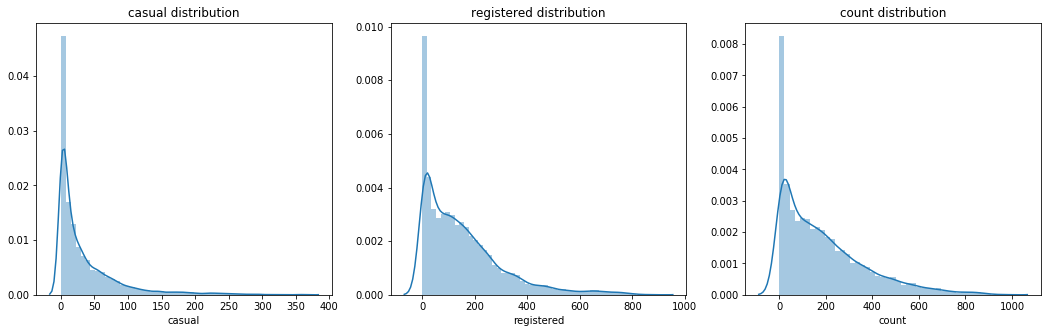

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

sns.distplot(train['casual'], ax = ax[0])
ax[0].set_title('casual distribution')

sns.distplot(train['registered'], ax = ax[1])
ax[1].set_title('registered distribution')

sns.distplot(train['count'], ax = ax[2])
ax[2].set_title('count distribution')

plt.show()

세 가지 모두 분포가 비슷해보인다. 대부분 0일 때가 가장 많다.
그러나 skewed to right이므로, log!

In [18]:
train['casual_log'] = np.log1p(train['casual'] + 1)
train['registered_log'] = np.log1p(train['registered'] + 1)
train['count_log'] = np.log1p(train['count'] + 1)

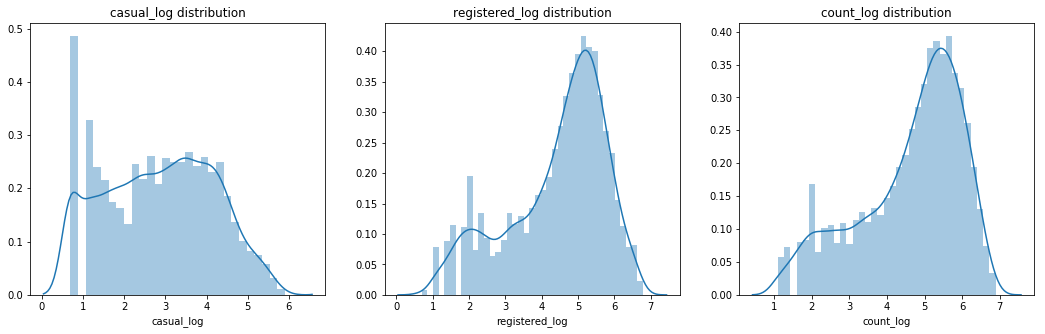

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

sns.distplot(train['casual_log'], ax = ax[0])
ax[0].set_title('casual_log distribution')

sns.distplot(train['registered_log'], ax = ax[1])
ax[1].set_title('registered_log distribution')

sns.distplot(train['count_log'], ax = ax[2])
ax[2].set_title('count_log distribution')

plt.show()

## datetime

In [38]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train['dayofweek'] = train['datetime'].dt.dayofweek #0 : Monday ~ 6 : Sunday

train.iloc[:,[0, 12,13,14,15,16,17,18]].head(3)

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5


In [40]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

test['dayofweek'] = test['datetime'].dt.dayofweek #0 : Monday ~ 6 : Sunday

test.iloc[:,[0, 9,10,11,12,13,14,15]].head(3)

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3


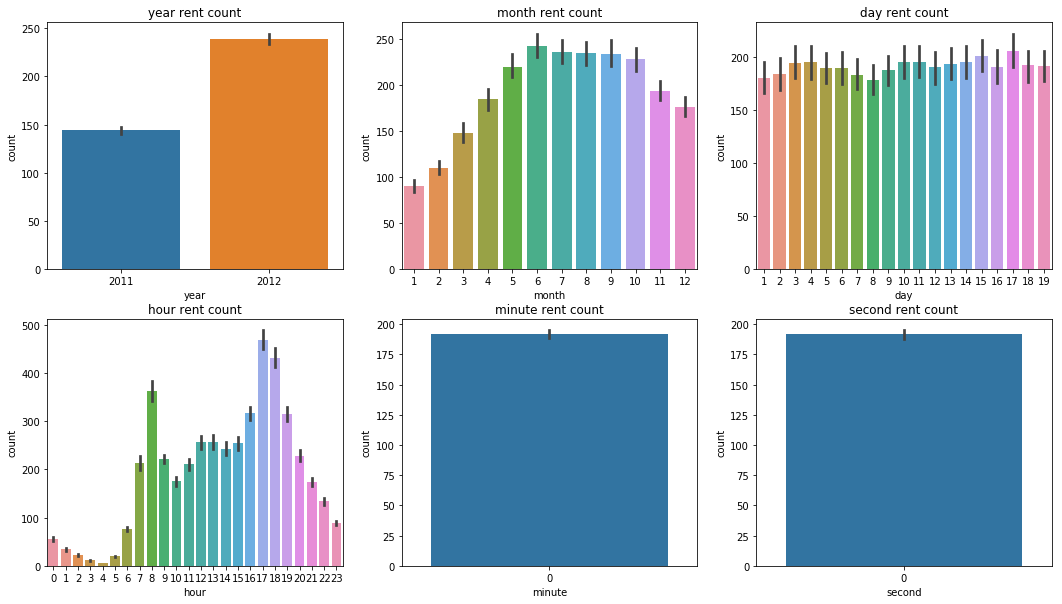

In [42]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,10))

cols = ['year', 'month', 'day', 'hour', 'minute','second']

for i, col in enumerate(cols) :
    sns.barplot(data = train, x = col,  y = 'count', ax = ax[i//3][i%3])
    title = col + ' rent count'
    ax[i//3][i%3].set_title(title)
    
plt.show()

- day : 1~19 : train / 20~ : test
- miniute, second : 모든 값이 0

위 세가지 feature는 빼겠다

## year

In [45]:
plt.style.use('bmh')
%matplotlib inline

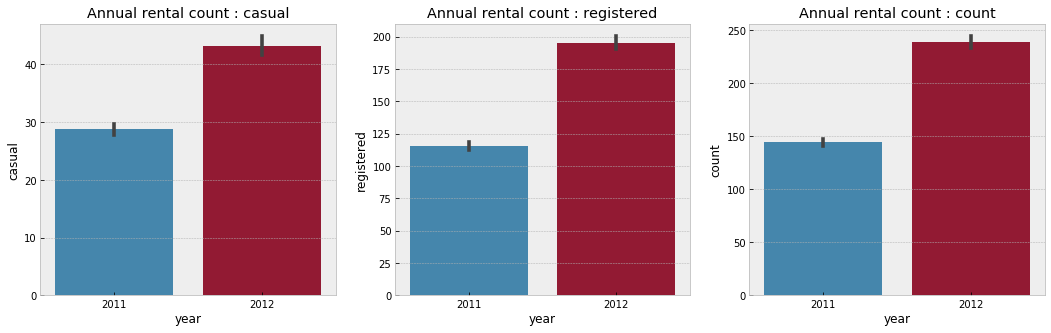

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.barplot(x = 'year', y = col, data = train, ax=ax[i])
    title = 'Annual rental count : ' + col
    ax[i].set_title(title)

casual, registered 모두 2011년 대비 2012년에 횟수가 많다.
자전거 대여 사업이 성장했다!

## month

Text(0.5, 1.0, 'Monthly atemp')

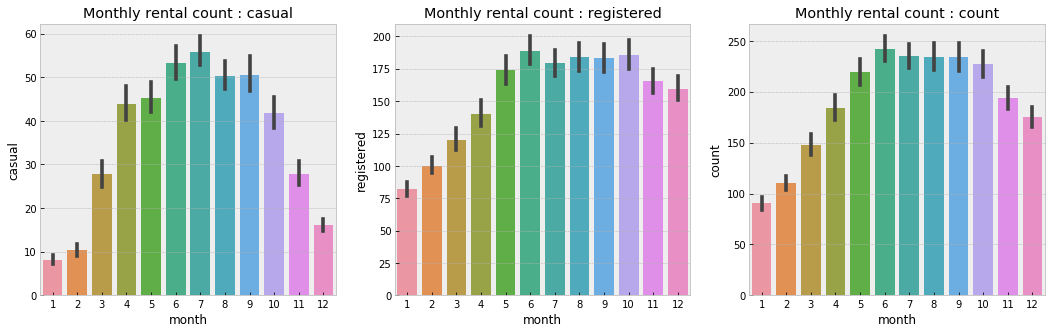

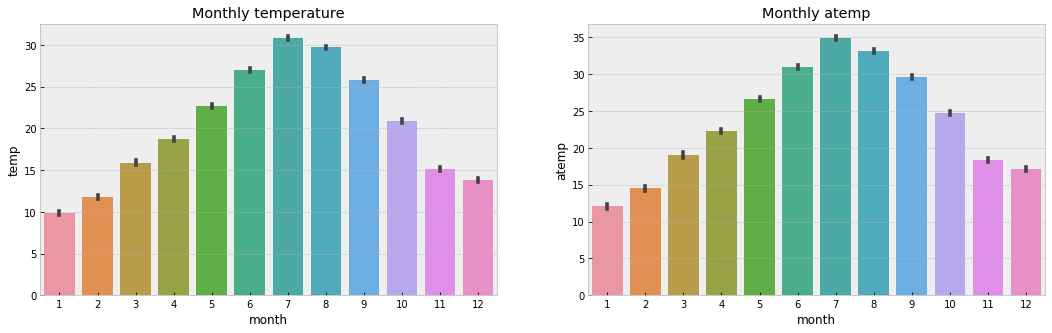

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.barplot(x = 'month', y = col, data = train, ax=ax[i])
    title = 'Monthly rental count : ' + col
    ax[i].set_title(title)
    

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(18,5))
sns.barplot(x = 'month', y = 'temp', data = train, ax = ax[0])
ax[0].set_title('Monthly temperature')
sns.barplot(x = 'month', y = 'atemp', data = train, ax = ax[1])
ax[1].set_title('Monthly atemp')

- month - count를 보았을 때, 1~2월 빌리는 사람이 적다! -> 추워서?
- month - temperature, atemp 그려봄! -> 1월과 12월의 온도 차가 크지 않다
- 근데 12월에 count가 훨씬 상승할까?


## year - month

In [48]:
train['year-month'] = train['year'].astype('str') + '-' + train['month'].astype('str')
train['year-month'].head(3)

0    2011-1
1    2011-1
2    2011-1
Name: year-month, dtype: object

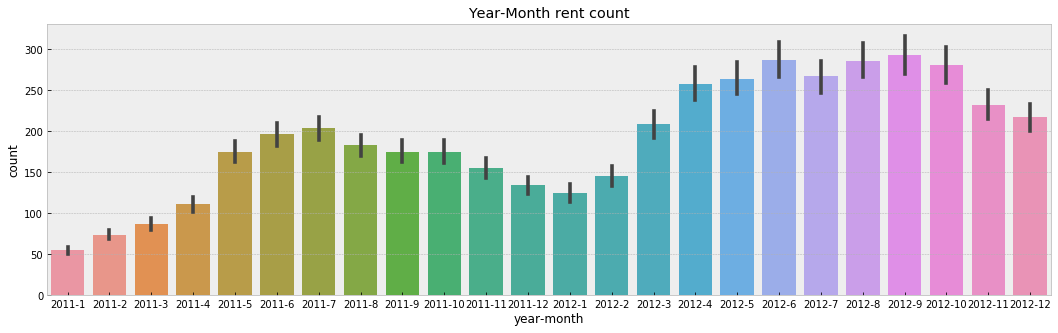

In [49]:
plt.figure(figsize = (18,5))
sns.barplot(data = train, x = 'year-month', y = 'count').set_title('Year-Month rent count')
plt.show()

- 1월부터 12월까지 2011년, 2012년 년 단위로 살펴보았을 때, 그 경향성은 비슷하다
- 12월에 많이 빌린 것이 그냥 업체의 성장 때문인 것 같다!

## hour

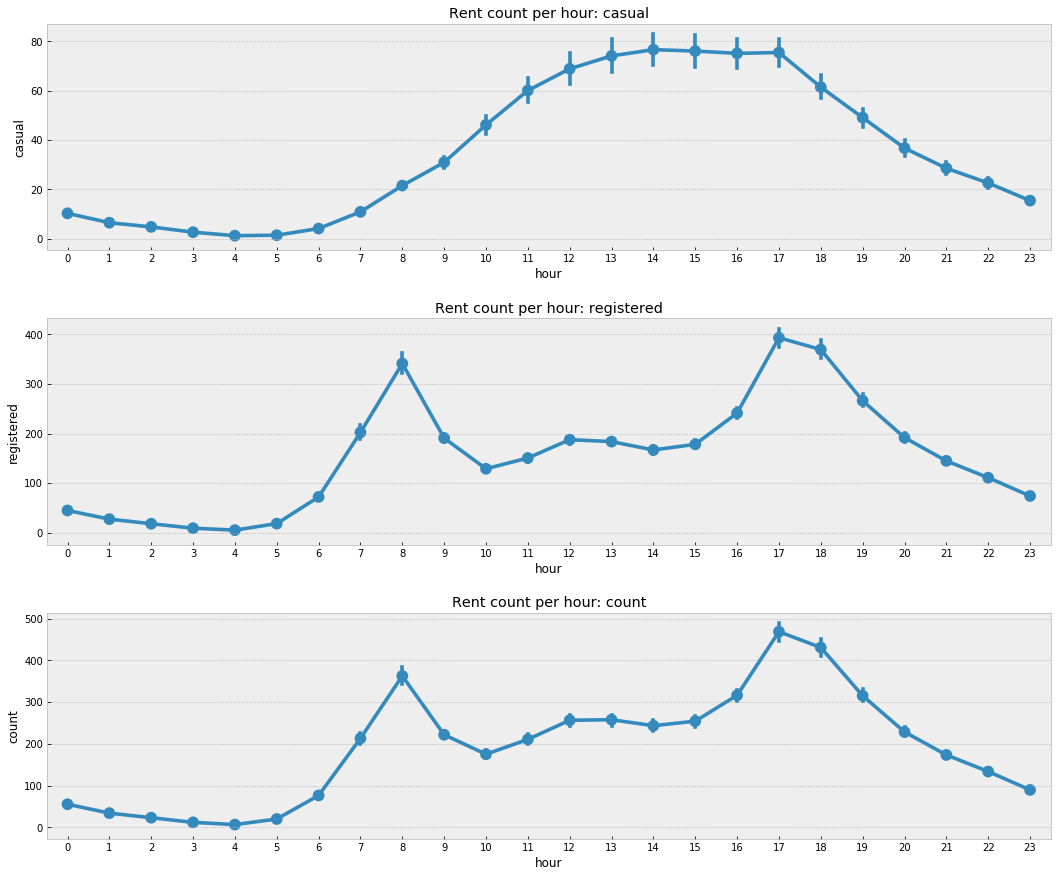

In [53]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (18,15))
plt.subplots_adjust(hspace= 0.3)

cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.pointplot(x = 'hour', y = col, data = train, ax=ax[i])
    title = 'Rent count per hour: ' + col
    ax[i].set_title(title)